<a href="https://colab.research.google.com/github/MinZhenTay/Recipe-Recommendation/blob/main/TopicModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
Recipie =pd.read_csv('/content/drive/MyDrive/FinalRecipieData.csv')

In [ ]:
Recipie

,Unnamed: 0,recipe_name,ingredients,cooking_directions,nutritions
0,0,air fried raspberry brie bites,"['1 (8 ounce) round brie cheese', '1 (8 ounce)...",['\nslice the brie into squares about ½ inch t...,"[{'calories': '274'}, {'fat': '21g '}, {'carbs..."
1,1,spicy chicken jerky in the air fryer,"['2 (5 ounce) boneless chicken breasts, cut in...","['\ncombine chicken strips, marinade, and caju...","[{'calories': '252'}, {'fat': '16g '}, {'carbs..."
2,2,air fryer scrambled eggs on the go,"[' cooking spray', '2 large eggs, beaten', ' ...",['\nlightly spray a ramekin dish with non-stic...,"[{'calories': '54'}, {'fat': '1g '}, {'carbs':..."
3,3,basic air fryer hot dogs,"['4 hot dog buns', '4 hot dogs']",['\npreheat an air fryer to 400 degrees f (200...,"[{'calories': '143'}, {'fat': '10g '}, {'carbs..."
4,4,air fryer potato wedges,"['2 medium russet potatoes', '1 ½ tablespoons ...",['\npreheat an air fryer to 400 degrees f (200...,"[{'calories': '269'}, {'fat': '15g '}, {'carbs..."
...,...,...,...,...,...
49528,45623,frozen seasoning pods,green bell pepper^red bell pepper^onion^celery...,{'directions': u'prep\n20 m\nready in\n3 h 20 ...,"{u'niacin': {u'hascompletedata': false, u'name..."
49529,45624,richard and suzannefamous spaghetti sauce,olive oil^garlic^large onion^large green bell ...,{'directions': u'cook\n25 m\nready in\n25 m\np...,"{u'niacin': {u'hascompletedata': true, u'name'..."
49530,45627,peach smoothie,sliced peaches drained^scoops vanilla ice crea...,{'directions': u'prep\n1 m\nready in\n1 m\nin ...,"{u'niacin': {u'hascompletedata': false, u'name..."
49531,45628,double dare peaches,butter^habanero peppers^fresh peaches^brown su...,{'directions': u'prep\n20 m\ncook\n10 m\nready...,"{u'niacin': {u'hascompletedata': true, u'name'..."


In [ ]:
import re
Recipie['ingredients']=Recipie['ingredients'].str.lower()
# # Proprocessing the data
# Code to remove the Hashtags from the text
Recipie['ingredients']=Recipie['ingredients'].apply(lambda x:re.sub(r'\B#\S+',' ',str(x)))
# Code to remove the links from the text
Recipie['ingredients']=Recipie['ingredients'].apply(lambda x:re.sub(r"http\S+", " ", x))
# Code to remove the Special characters from the text 
Recipie['ingredients']=Recipie['ingredients'].apply(lambda x:' '.join(re.findall(r'\w+', x)))

Recipie['ingredients']=Recipie['ingredients'].apply(lambda x:re.sub('[0-9]', ' ', x))


# Code to remove all the single characters in the text
Recipie['ingredients']=Recipie['ingredients'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', ' ', x))
# Remove the twitter handlers
Recipie['ingredients']=Recipie['ingredients'].apply(lambda x:re.sub('@[^\s]+',' ',x))
# Code to substitute the multiple spaces with single spaces
Recipie['ingredients']=Recipie['ingredients'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
Recipie['ingredients']

0         ounce round brie cheese ounce package phyllo ...
1         ounce boneless chicken breasts cut into strip...
2        cooking spray large eggs beaten salt and fresh...
3                                    hot dog buns hot dogs
4         medium russet potatoes ½ tablespoons olive oi...
                               ...                        
49528    green bell pepper red bell pepper onion celery...
49529    olive oil garlic large onion large green bell ...
49530    sliced peaches drained scoops vanilla ice crea...
49531    butter habanero peppers fresh peaches brown su...
49532    olive oil bulb garlic tomatoes chopped diced t...
Name: ingredients, Length: 49533, dtype: object

In [ ]:
import re
Recipie['cooking_directions']=Recipie['cooking_directions'].str.lower()
# # Proprocessing the data
# Code to remove the Hashtags from the text
Recipie['cooking_directions']=Recipie['cooking_directions'].apply(lambda x:re.sub(r'\B#\S+',' ',str(x)))
# Code to remove the links from the text
Recipie['cooking_directions']=Recipie['cooking_directions'].apply(lambda x:re.sub(r"http\S+", " ", x))
# Code to remove the Special characters from the text 
Recipie['cooking_directions']=Recipie['cooking_directions'].apply(lambda x:' '.join(re.findall(r'\w+', x)))

Recipie['cooking_directions']=Recipie['cooking_directions'].apply(lambda x:re.sub('[0-9]', ' ', x))
# Code to remove all the single characters in the text
Recipie['cooking_directions']=Recipie['cooking_directions'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', ' ', x))
# Remove the twitter handlers
Recipie['cooking_directions']=Recipie['cooking_directions'].apply(lambda x:re.sub('@[^\s]+',' ',x))
Recipie['cooking_directions']=Recipie['cooking_directions'].apply(lambda x:re.sub('[0-9]', ' ', x))

# Code to substitute the multiple spaces with single spaces
Recipie['cooking_directions']=Recipie['cooking_directions'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

Recipie['cooking_directions'][1 ]

'ncombine chicken strips marinade and cajun seasoning in resealable plastic bag refrigerate for hours to overnight nmeasure skewers to fit across the air fryer basket slightly overlapping the edge trim off excess length npreheat the air fryer to degrees degrees for minutes nthread chicken strips onto skewers leaving room in between each strip while the air fryer is preheating nair fry for hour minutes adjust cooking time as most air fryers have maximum setting of minutes rearrange the skewers during the reset time nincrease temperature to degrees degrees and air fry for an additional minutes nremove strips to paper towel lined storage container seal allow to rest overnight before serving n'

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
def wordcloud_draw(data, color = 'black'):
    
    words = ' '.join(data)
    
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      max_words=50,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

    

In [ ]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop = stopwords.words('english')
# import these modules
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# toknize the text
Recipie['cooking_directions']=Recipie['cooking_directions'].apply(word_tokenize)

# remove the stop words
Recipie['cooking_directions'] = Recipie['cooking_directions'].apply(lambda x: ' '.join([lemmatizer.lemmatize(item) for item in x if item not in stop]))


In [ ]:
# toknize the text
Recipie['ingredients']=Recipie['ingredients'].apply(word_tokenize)

# remove the stop words
Recipie['ingredients'] = Recipie['ingredients'].apply(lambda x: ' '.join([lemmatizer.lemmatize(item) for item in x if item not in stop]))


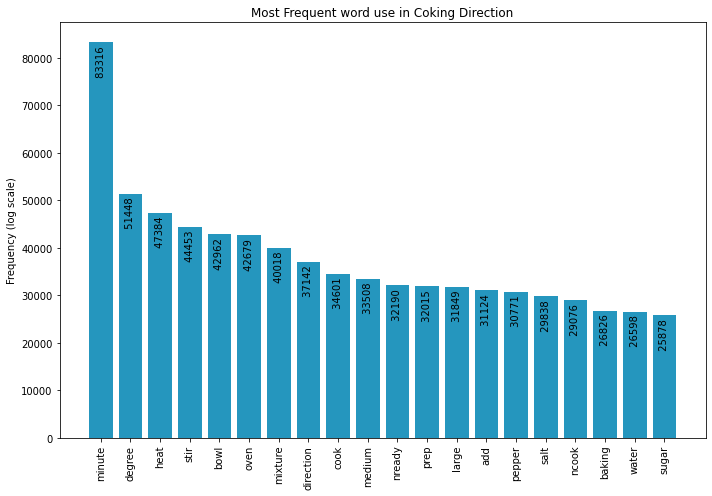

In [ ]:
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt


Counter=Counter(" ".join(Recipie['cooking_directions']).split())




y = [count for tag, count in Counter.most_common(20)]
x = [tag for tag, count in Counter.most_common(20)]




# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(4)
plt.rcParams["figure.figsize"] = (10,7)
plt.bar(x, y, color='#2596be')
plt.title("Most Frequent word use in Coking Direction")
plt.ylabel("Frequency (log scale)")
# plt.yscale('log') # optionally set a log scale for the y-axis
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(Counter.most_common(20)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top'  , color='black' )
plt.xlim() # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

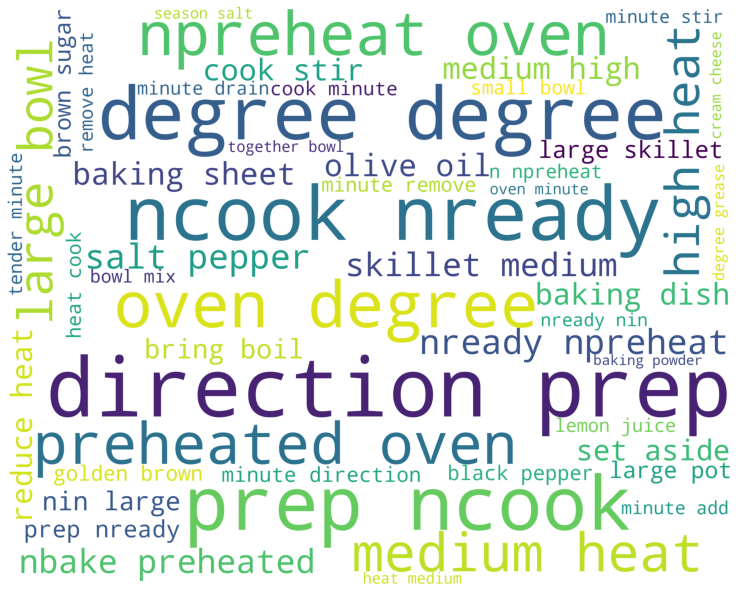

In [ ]:
wordcloud_draw( Recipie['cooking_directions'].astype(str),'white')

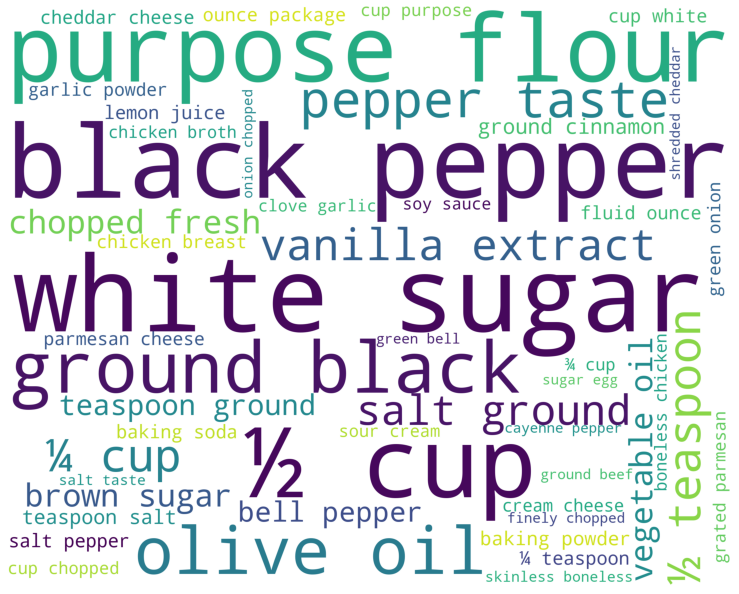

In [ ]:
wordcloud_draw( Recipie['ingredients'].astype(str),'white')

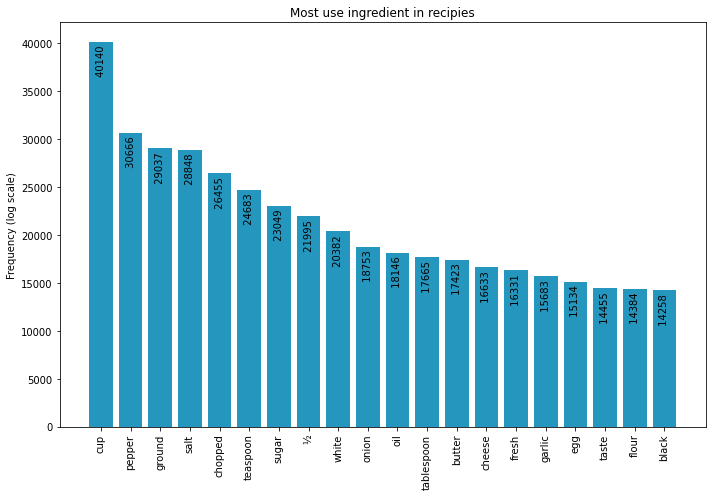

In [ ]:
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt


Counter=Counter(" ".join(Recipie['ingredients']).split())




y = [count for tag, count in Counter.most_common(20)]
x = [tag for tag, count in Counter.most_common(20)]




# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(4)
plt.rcParams["figure.figsize"] = (10,7)
plt.bar(x, y, color='#2596be')
plt.title("Most use ingredient in recipies")
plt.ylabel("Frequency (log scale)")
# plt.yscale('log') # optionally set a log scale for the y-axis
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(Counter.most_common(20)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top'  , color='black' )
plt.xlim() # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

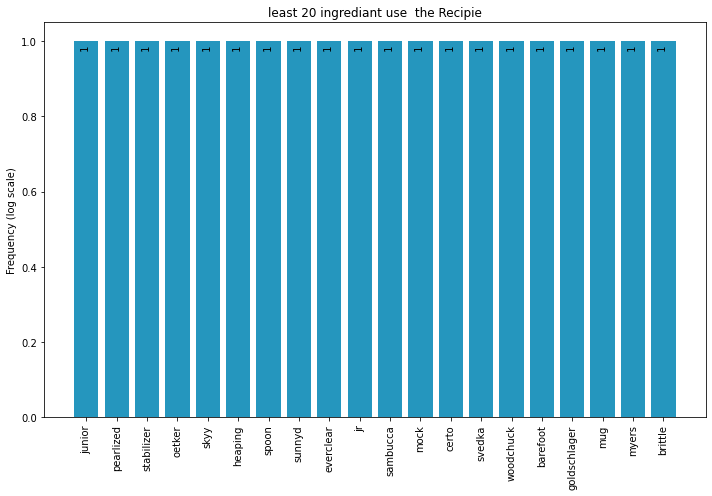

In [ ]:
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt


Counter=Counter(" ".join(Recipie['ingredients']).split())




y = [count for tag, count in Counter.most_common()[-20:]]
x = [tag for tag, count in Counter.most_common()[-20:]]


# print(x)


# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(4)
plt.rcParams["figure.figsize"] = (10,7)
plt.bar(x, y, color='#2596be')
plt.title("least 20 ingrediant use  the Recipie")
plt.ylabel("Frequency (log scale)")
# plt.yscale('log') # optionally set a log scale for the y-axis
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(Counter.most_common()[-20:]):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top'  , color='black' )
plt.xlim() # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()


yvonnetay18




Dec 24, 2022, 7:20 PM
ReportSpam
Revised Graph for EDA:
Number of ingredients in each recipe,
top 20 ingredients that most frequently used,
top 20 ingredients that least frequently used,
word cloud for ingredients,
word cloud for cooking instruction,

correlation matrix for continuous variable (nutritional value: calories, carbohydrate, protein, fats and number of ingredients),
relationship between calories contents and number of ingredients,
relationship between calories contents and carbohydrates content,
relationship between calories contents and protein content,
relationship between calories contents and fats content

In [ ]:
Recipie['fullText'] = Recipie['recipe_name'] + ' ' + Recipie['cooking_directions'] + ' ' + Recipie['ingredients']
Recipie['fullText']

0        air fried raspberry brie bites nslice the brie...
1        spicy chicken jerky in the air fryer ncombine ...
2        air fryer scrambled eggs on the go nlightly sp...
3        basic air fryer hot dogs npreheat an air fryer...
4        air fryer potato wedges npreheat an air fryer ...
                               ...                        
49528    frozen seasoning pods directions prep nready i...
49529    richard and suzannefamous spaghetti sauce dire...
49530    peach smoothie directions prep nready in nin b...
49531    double dare peaches directions prep ncook nrea...
49532    all purpose marinara sauce directions prep nco...
Name: fullText, Length: 49533, dtype: object

In [ ]:
# toknize the text
Recipie['fullText']=Recipie['fullText'].apply(word_tokenize)

# remove the stop words
Recipie['fullText'] = Recipie['fullText'].apply(lambda x: ' '.join([lemmatizer.lemmatize(item) for item in x if item not in stop]))


In [ ]:
all_text=Recipie['fullText']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(lowercase = True,
                            ngram_range = (1,1))

text_tfidf = vectorizer.fit_transform(all_text)
tfidf_words = vectorizer.get_feature_names()
print(text_tfidf.shape)
print(len(tfidf_words))

(49533, 18440)
18440


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
text_tfidf.shape

(49533, 18440)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components = 50,
          n_jobs = -1,
          max_iter = 100)
text_lda = lda.fit_transform(text_tfidf)
text_lda.shape

(49533, 50)

In [ ]:
from sklearn.decomposition import NMF

nmf = NMF(alpha=0.0,
         init='nndsvdar',
         l1_ratio=0.0,
         max_iter = 100,
         n_components = 50,
         solver='cd')

text_nmf = nmf.fit_transform(text_tfidf)
text_nmf.shape

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(


(49533, 50)

In [ ]:
# variable dependencies:
text_series = pd.Series(all_text)

def docs_by_tops(top_mat, topic_range = (0,0), doc_range = (0,2)):
    for i in range(topic_range[0], topic_range[1]):
        topic_scores = pd.Series(top_mat[:,i])
        doc_index = topic_scores.sort_values(ascending = False)[doc_range[0]:doc_range[1]].index
        for j, index in enumerate(doc_index, doc_range[0]):
            print('Topic #{}'.format(i),
                  '\nDocument #{}'.format(j),
                  '\nTopic Score: {}\n\n'.format(topic_scores[index]),
                  text_series[index], '\n\n')

In [ ]:
docs_by_tops(text_lda,(0,3),(0,3))

In [ ]:
text_nmf.shape

(49533, 50)

In [ ]:
text_tfidf.T.shape

(18440, 49533)

In [ ]:
# Function for best topic words using cosine similarity
# Variable Dependency:
word_series = pd.Series(tfidf_words)

def words_by_tops(tfidf_mat, top_mat, topic_range=(0,0), n_words=10):
    topic_word_scores = tfidf_mat.T * top_mat
    for i in range(topic_range[0],topic_range[1]):
        word_scores = pd.Series(topic_word_scores[:,i])
        word_index = word_scores.sort_values(ascending = False)[:n_words].index
        print('\nTopic #{}'.format(i))
        for index in word_index:
            print(word_series[index],'\t\t', word_scores[index])

In [ ]:
# Keywords using LDA
words_by_tops(text_tfidf, text_lda, (0,3), 10)


Topic #0
pepper 		 7.988385552446192
cup 		 7.04990191970268
sugar 		 7.042321030893713
salt 		 6.701349347813243
minute 		 6.557777353158674
cheese 		 6.434663283883317
degree 		 6.314997597021163
onion 		 6.233707551971404
chicken 		 6.092000290133397
butter 		 5.978895889272947

Topic #1
banana 		 97.26627332824798
ice 		 95.32487114931725
milk 		 74.31046179572564
strawberry 		 70.42216714745851
blender 		 63.331114579273695
yogurt 		 63.208290372921454
vanilla 		 49.028599772741025
smoothie 		 47.115772746397674
smooth 		 46.40166153294242
sugar 		 44.43368981535954

Topic #2
pepper 		 9.171877771036574
salt 		 8.047878098874243
minute 		 7.917513842875911
cup 		 7.910231160649619
sugar 		 7.7644656227885935
couscous 		 7.574797308026221
oil 		 7.423072443921847
cheese 		 7.349998620119904
onion 		 7.324905406328774
degree 		 6.934462343200017


In [ ]:
# Pulling the top one-hundred documents ranked in similarity among Topic #1
text_index = pd.Series(text_nmf[:,1]).sort_values(ascending = False)[:100].index
text_4summary = pd.Series(all_text)[text_index]

# Manually Creating a list of recipe stop
recipe_stopwords = ['cup','cups','ingredient','ingredients','teaspoon','tablespoon','oven']

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
# generating topic filter
import time
start_time = time.time()

parsed_texts = nlp(' '.join(text_4summary)) 
kw_filts = set([str(word) for word in parsed_texts 
                if (word.pos_== ('NOUN' or 'ADJ' or 'VERB'))
                and str(word) not in recipe_stopwords])

print('Execution Time: {} seconds', time.time() - start_time)

Execution Time: {} seconds 1.4691367149353027


In [ ]:
# Creating adjecency Table for recipes.
adjacency = pd.DataFrame(columns=kw_filts, index=kw_filts, data = 0)
for i, word in enumerate(parsed_texts):
    if any ([str(word) == item for item in kw_filts]):
        end = min(len(parsed_texts), i+5) # Window of four words
        nextwords = parsed_texts[i+1:end]
        inset = [str(x) in kw_filts for x in nextwords]
        neighbors = [str(nextwords[i]) for i in range(len(nextwords)) if inset[i]]
        if neighbors:
            adjacency.loc[str(word)] += 1

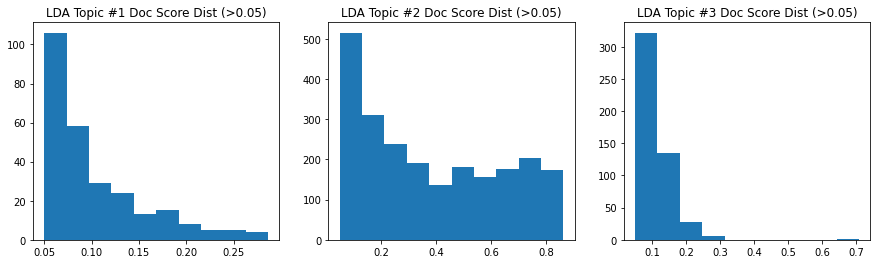

In [ ]:
import matplotlib.pyplot as plt
# text_lda
# text_nmf
# ranked
# LDA Topic documents for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_lda[:,i])
    plt.subplot(1,3,i+1)
    plt.hist(series[series > 0.05])
    plt.title('LDA Topic #{} Doc Score Dist (>0.05)'.format(i+1))
plt.show()


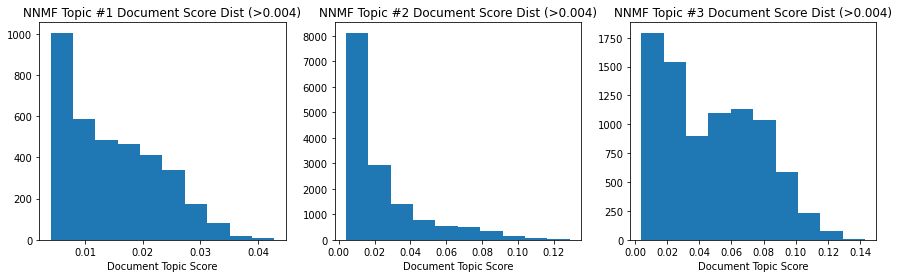

In [ ]:
# NNMF Topic documents for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_nmf[:,i])
    plt.subplot(1,3,i+1)
    plt.hist(series[series > 0.004])
    plt.title('NNMF Topic #{} Document Score Dist (>0.004)'.format(i+1))
    plt.xlabel('Document Topic Score')
#plt.savefig('DocsByTop_Score_Distributions.png', transparent = True)
plt.show()

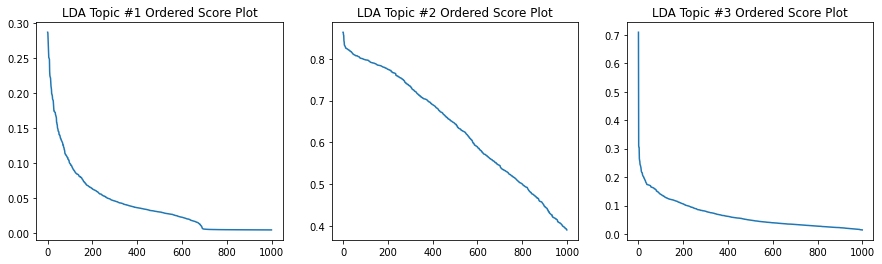

In [ ]:
# LDA Topic document scores for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_lda[:,i]).copy().sort_values(ascending = False).reset_index(drop = True)
    plt.subplot(1,3,i+1)
    plt.plot(series[:1000])
    plt.title('LDA Topic #{} Ordered Score Plot'.format(i+1))
plt.show()

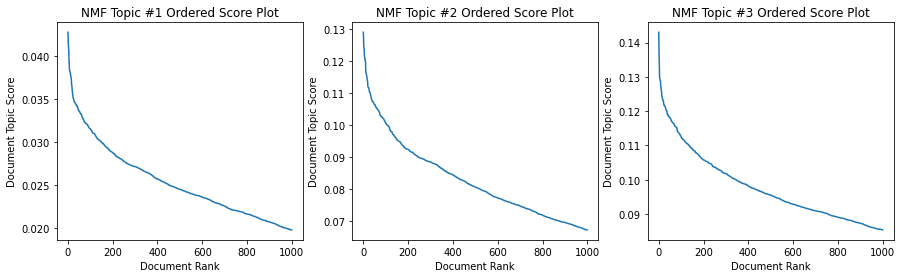

In [ ]:
# NMF Topic document scores for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_nmf[:,i]).copy().sort_values(ascending = False).reset_index(drop = True)
    plt.subplot(1,3,i+1)
    plt.plot(series[:1000])
    plt.title('NMF Topic #{} Ordered Score Plot'.format(i+1))
    plt.xlabel('Document Rank')
    plt.ylabel('Document Topic Score')
#plt.savefig('DocsByTop_Score_Elbows.png', transparent = True)
from sklearn.feature_extraction.text import TfidfVectorizer
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle


Recipie['ingredients_parsed'] =Recipie.ingredients.values.astype('U')
# TF-IDF feature extractor
tfidf = TfidfVectorizer()
tfidf.fit(Recipie['ingredients_parsed'])
tfidf_recipe = tfidf.transform(Recipie['ingredients_parsed'])
# save the tfidf model and encodings
with open('TFIDF_MODEL_PATH.pk', "wb") as f:
     pickle.dump(tfidf, f)
with open('TFIDF_ENCODING_PATH.pk', "wb") as f:
     pickle.dump(tfidf_recipe, f)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# from ingredient_parser import ingredient_parser
# load in tdidf model and encodings
with open('TFIDF_ENCODING_PATH.pk', 'rb') as f:
     tfidf_encodings = pickle.load(f)
with open('TFIDF_MODEL_PATH.pk', "rb") as f:
     tfidf = pickle.load(f)
# # parse the ingredients using my ingredient_parser
# try:
#     ingredients_parsed = ingredient_parser(ingredients)
# except:
#     ingredients_parsed = ingredient_parser([ingredients])
# use our pretrained tfidf model to encode our input ingredients
ingredients_tfidf = tfidf.transform(Recipie['ingredients_parsed'])
# calculate cosine similarity between actual recipe ingreds and test ingreds
cos_sim = map(lambda x: cosine_similarity(ingredients_tfidf, x), tfidf_encodings)
scores = list(cos_sim)

In [ ]:
def get_recommendations(N, scores):
    # load in recipe dataset
    df_recipes = pd.read_csv('/content/drive/MyDrive/FinalRecipieData.csv')
    # order the scores with and filter to get the highest N scores
    top = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:N]
    # create dataframe to load in recommendations
    recommendation = pd.DataFrame(columns = ['recipe', 'ingredients', 'cooking_directions', 'score'])
    count = 0
    for i in top:
        recommendation.at[count, 'recipe'] = title_parser(df_recipes['recipe_name'][i])
        
        recommendation.at[count, 'ingredients'] = ingredient_parser_final(df_recipes['ingredients'][i])
        recommendation.at[count, 'cooking_directions'] = ingredient_parser_final(df_recipes['cooking_directions'][i])
        
        recommendation.at[count, 'score'] = "{:.3f}".format(float(scores[i]))
        
        count += 1
    return recommendation

In [ ]:
# Set All Recommendation Model Parameters
N_topics = 50             # Number of Topics to Extract from corpora
N_top_docs = 200          # Number of top documents within each topic to extract keywords
N_top_words = 25          # Number of keywords to extract from each topic
N_docs_categorized = 2000 # Number of top documents within each topic to tag 
N_neighbor_window = 4     # Length of word-radius that defines the neighborhood for
                          # each word in the TextRank adjacency table

# Query Similarity Weights
w_title = 0.2
w_text = 0.3
w_categories = 0.5
w_array = np.array([w_title, w_text, w_categories])

# Recipe Stopwords: for any high volume food recipe terminology that doesn't contribute
# to the searchability of a recipe. This list must be manually created.
recipe_stopwords = ['cup','cups','ingredient','ingredients','teaspoon','teaspoons','tablespoon',
                   'tablespoons','C','F']

In [ ]:
# Renaming Data Dependencies
topic_transformed_matrix = text_nmf
root_text_data = all_text

In [ ]:
from itertools import repeat

#recipes['tag_list'] = [[] for i in repeat(None, recipes.shape[0])]

def topic_docs_4kwsummary(topic_document_scores, root_text_data):
    '''Gathers and formats the top recipes in each topic'''
    text_index = pd.Series(topic_document_scores).sort_values(ascending = False).index
    text_4kwsummary = pd.Series(root_text_data)[text_index]
    return text_4kwsummary

def generate_filter_kws(text_list):
    '''Filters out specific parts of speech and stop words from the list of potential keywords'''
    parsed_texts = nlp(' '.join(text_list)) 
    kw_filts = set([str(word) for word in parsed_texts 
                if (word.pos_== ('NOUN' or 'ADJ' or 'VERB'))
                and word.lemma_ not in recipe_stopwords])
    return list(kw_filts), parsed_texts

def generate_adjacency(kw_filts, parsed_texts):
    '''Tabulates counts of neighbors in the neighborhood window for each unique word'''
    adjacency = pd.DataFrame(columns=kw_filts, index=kw_filts, data = 0)
    for i, word in enumerate(parsed_texts):
        if any ([str(word) == item for item in kw_filts]):
            end = min(len(parsed_texts), i+N_neighbor_window+1) # Neighborhood Window Utilized Here
            nextwords = parsed_texts[i+1:end]
            inset = [str(x) in kw_filts for x in nextwords]
            neighbors = [str(nextwords[i]) for i in range(len(nextwords)) if inset[i]]
            if neighbors:
                adjacency.loc[str(word), neighbors] += 1
    return adjacency
              
def generate_wordranks(adjacency):
    '''Runs TextRank on adjacency table'''
    nx_words = nx.from_numpy_matrix(adjacency.values)
    ranks=nx.pagerank(nx_words, alpha=.85, tol=.00000001)
    return ranks

def generate_tag_list(ranks):
    '''Uses TextRank ranks to return actual key words for each topic in rank order'''
    rank_values = [i for i in ranks.values()]
    ranked = pd.DataFrame(zip(rank_values, list(kw_filts))).sort_values(by=0,axis=0,ascending=False)
    kw_list = ranked.iloc[:N_top_words,1].to_list()
    return kw_list

# Master Function utilizing all above functions
def generate_tags(topic_document_scores, root_text_data):
    text_4kwsummary = topic_docs_4kwsummary(topic_document_scores, root_text_data)
    kw_filts, parsed_texts = generate_filter_kws(text_4kwsummary)
    adjacency = generate_adjacency(kw_filts, parsed_texts)
    ranks = generate_wordranks(adjacency)
    kw_list = generate_tag_list(ranks)
    return kw_list

def generate_kw_index(topic_document_scores):
    kw_index = pd.Series(topic_document_scores).sort_values(ascending = False).index
    return kw_index


In [ ]:
# Generating Tags and distributing to relevant documents
for i in range(topic_transformed_matrix.shape[1]):
    scores = topic_transformed_matrix[:,i]
    topic_kws = generate_tags(scores, root_text_data)
    kw_index_4df = generate_kw_index(scores)
    recipes.loc[kw_index_4df, 'tag_list'] += topic_kws
    if i%10 == 0:
        print('Topic #{} Checkpoint'.format(i))
print('done!')

ValueError: ignored

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(lowercase = True,
                            ngram_range = (1,1))

text_tfidf = vectorizer.fit_transform(all_text)
tfidf_words = vectorizer.get_feature_names()
print(text_tfidf.shape)
print(len(tfidf_words))

(49533, 18440)
18440


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
text_tfidf.shape

(49533, 18440)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components = 50,
          n_jobs = -1,
          max_iter = 100)
text_lda = lda.fit_transform(text_tfidf)
text_lda.shape

(49533, 50)

In [ ]:
from sklearn.decomposition import NMF

nmf = NMF(alpha=0.0,
         init='nndsvdar',
         l1_ratio=0.0,
         max_iter = 100,
         n_components = 50,
         solver='cd')

text_nmf = nmf.fit_transform(text_tfidf)
text_nmf.shape

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(


(49533, 50)

In [ ]:
# variable dependencies:
# text_series = pd.Series(all_text)

def docs_by_tops(top_mat, topic_range = (0,0), doc_range = (0,2)):
    for i in range(topic_range[0], topic_range[1]):
        topic_scores = pd.Series(top_mat[:,i])
        doc_index = topic_scores.sort_values(ascending = False)[doc_range[0]:doc_range[1]].index
        for j, index in enumerate(doc_index, doc_range[0]):
            print('Topic #{}'.format(i),
                  '\nDocument #{}'.format(j),
                  '\nTopic Score: {}\n\n'.format(topic_scores[index]),
                  Recipie['fullText'][index], '\n\n')

In [ ]:
docs_by_tops(text_lda,(0,3),(0,3))

Topic #0 
Document #0 
Topic Score: 0.8440584236870294

 honey barbecue sauce direction prep nready nin medium bowl stir together honey molasses ketchup cinnamon paprika ginger seasoned salt meat tenderizer ground black pepper salt oregano garlic steak sauce worcestershire sauce mustard brown sugar well blended ncover refrigerate ready use honey molasses ketchup ground cinnamon paprika ground ginger seasoned salt meat tenderizer ground black pepper salt dried oregano minced garlic steak sauce worcestershire sauce prepared mustard brown sugar 


Topic #0 
Document #1 
Topic Score: 0.8289479141079985

 homemade bbq sauce ncombine brown sugar ketchup vinegar water worcestershire sauce blender season mustard paprika salt pepper hot pepper sauce blend smooth n ½ cup brown sugar ½ cup ketchup ½ cup red wine vinegar ½ cup water tablespoon worcestershire sauce ½ tablespoon dry mustard teaspoon paprika teaspoon salt ½ teaspoon black pepper dash hot pepper sauce 


Topic #0 
Document #2 
Topic S

In [ ]:
text_nmf.shape

(49533, 50)

In [ ]:
text_tfidf.T.shape

(18440, 49533)

In [ ]:
# Function for best topic words using cosine similarity
# Variable Dependency:
word_series = pd.Series(tfidf_words)

def words_by_tops(tfidf_mat, top_mat, topic_range=(0,0), n_words=10):
    topic_word_scores = tfidf_mat.T * top_mat
    for i in range(topic_range[0],topic_range[1]):
        word_scores = pd.Series(topic_word_scores[:,i])
        word_index = word_scores.sort_values(ascending = False)[:n_words].index
        print('\nTopic #{}'.format(i))
        for index in word_index:
            print(word_series[index],'\t\t', word_scores[index])

In [ ]:
# Pulling the top one-hundred documents ranked in similarity among Topic #1
text_index = pd.Series(text_nmf[:,1]).sort_values(ascending = False)[:100].index


# Manually Creating a list of recipe stop
recipe_stopwords = ['cup','cups','ingredient','ingredients','teaspoon','tablespoon','oven']

In [ ]:
text_4summary = pd.Series(Recipie['fullText'])[text_index]

In [ ]:
text_4summary

27977    oatmeal cooky light direction prep ncook nread...
26563    self frosting oatmeal cooky direction prep nco...
26588    fabulous chocolate cooky direction prep ncook ...
30327    walnut cooky ii direction prep ncook nready np...
32981    sarahraisin cooky direction prep ncook nready ...
                               ...                        
32506    vanilla crispies direction medium bowl cream t...
33011    pride iowa cooky direction preheat oven degree...
49184    blondies direction prep ncook nready npreheat ...
29282    honey oatmeal chewies direction preheat oven d...
11268    pecan shortbread cooky npreheat oven degree de...
Name: fullText, Length: 100, dtype: object

In [ ]:
!pip install spacy

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
# generating topic filter
import time
start_time = time.time()

parsed_texts = nlp(' '.join(text_4summary)) 
kw_filts = set([str(word) for word in parsed_texts 
                if (word.pos_== ('NOUN' or 'ADJ' or 'VERB'))
                and str(word) not in recipe_stopwords])

print('Execution Time: {} seconds', time.time() - start_time)

Execution Time: {} seconds 1.4516031742095947


In [ ]:
text_index

Int64Index([27977, 26563, 26588, 30327, 32981, 32000, 26997, 32792, 30310,
            32798, 29636, 28899, 32928, 29351, 31815, 12004, 31355, 29970,
            30482, 31701, 27350, 28212, 11990, 29375, 30319, 31673, 31155,
            29839, 31945,  4207, 32884, 26501, 30515, 32737, 27339, 30259,
            29576, 31187, 27437, 28615, 32379,  4205, 27659, 47251, 29001,
            27535, 26619, 26505, 30206, 26575, 31435, 32153, 31717, 28134,
            27959, 31955, 26503, 27427, 27020, 30859, 28211, 32736, 29370,
            27441, 28511, 32874, 28533, 26918, 28666, 27554, 29471, 27197,
            31763, 30885, 31796, 28410, 33040, 30960, 28011, 26666, 29090,
             3380, 28059, 30993, 32170, 30581, 31926, 27564, 29352, 32669,
            27028, 32122, 26581,  8455, 31924, 32506, 33011, 49184, 29282,
            11268],
           dtype='int64')

In [ ]:
# Keywords using LDA
words_by_tops(text_tfidf, text_lda, (0,3), 10)


Topic #0
sauce 		 66.09152570351714
pepper 		 45.91090765748088
ketchup 		 39.85479674660105
powder 		 38.77371141139594
worcestershire 		 33.075922331919855
sugar 		 32.38292737206032
mustard 		 32.02883737493282
onion 		 30.29416042623989
garlic 		 28.556506865667735
vinegar 		 28.04889651830739

Topic #1
cheese 		 436.24007999120215
degree 		 207.60050547068136
oven 		 198.41888611945234
dish 		 175.87101254095046
pepper 		 168.05945190389033
onion 		 163.72243916429383
minute 		 154.6493634834611
mushroom 		 152.39413422761788
cream 		 144.87089161336368
casserole 		 136.71809826130098

Topic #2
sugar 		 7.923319092049501
pepper 		 7.766484545651324
cup 		 7.586964595830769
butter 		 7.027228231526082
degree 		 7.013923199722572
minute 		 7.007659792348694
cheese 		 6.876929775150418
salt 		 6.683694661090642
onion 		 6.313792107687753
chicken 		 6.18696503292342


In [ ]:
import matplotlib.pyplot as plt
# text_lda
# text_nmf
# ranked

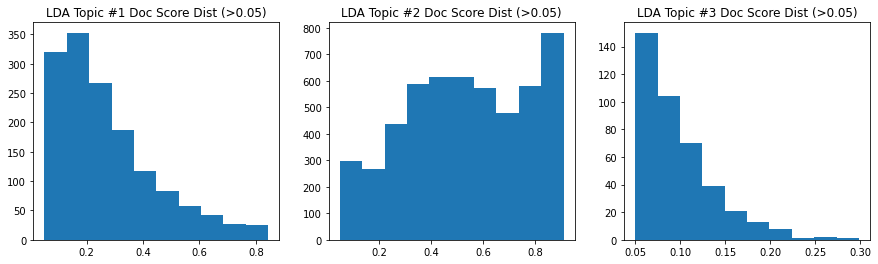

In [ ]:
# LDA Topic documents for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_lda[:,i])
    plt.subplot(1,3,i+1)
    plt.hist(series[series > 0.05])
    plt.title('LDA Topic #{} Doc Score Dist (>0.05)'.format(i+1))
plt.show()

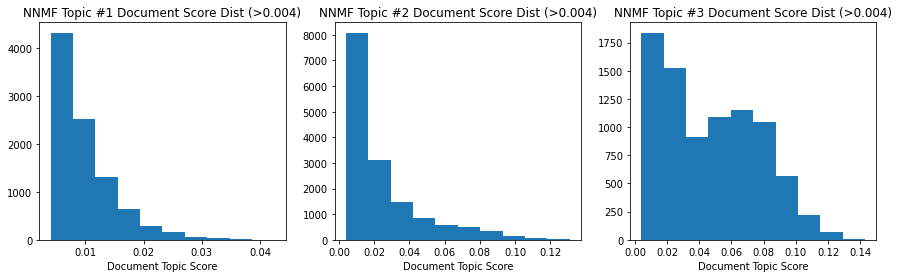

In [ ]:
# NNMF Topic documents for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_nmf[:,i])
    plt.subplot(1,3,i+1)
    plt.hist(series[series > 0.004])
    plt.title('NNMF Topic #{} Document Score Dist (>0.004)'.format(i+1))
    plt.xlabel('Document Topic Score')
#plt.savefig('DocsByTop_Score_Distributions.png', transparent = True)
plt.show()

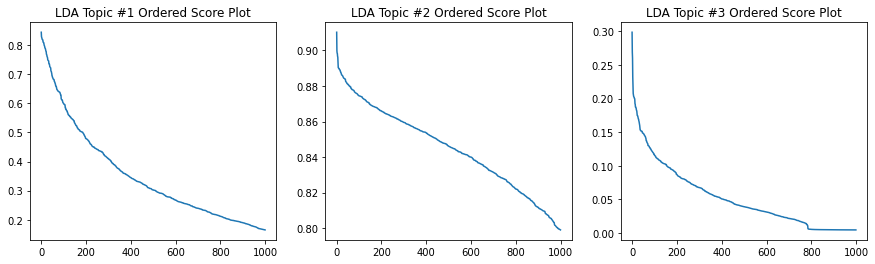

In [ ]:
# LDA Topic document scores for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_lda[:,i]).copy().sort_values(ascending = False).reset_index(drop = True)
    plt.subplot(1,3,i+1)
    plt.plot(series[:1000])
    plt.title('LDA Topic #{} Ordered Score Plot'.format(i+1))
plt.show()

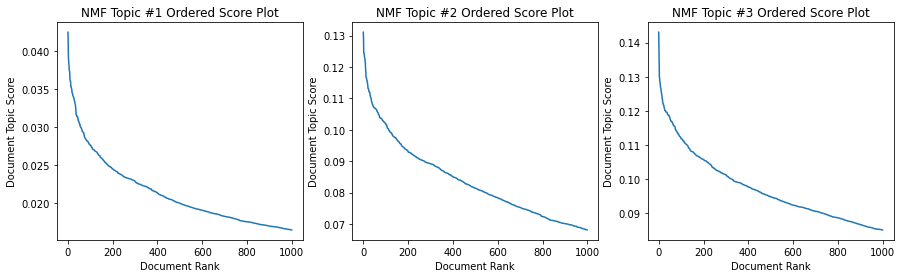

In [ ]:
# NMF Topic document scores for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_nmf[:,i]).copy().sort_values(ascending = False).reset_index(drop = True)
    plt.subplot(1,3,i+1)
    plt.plot(series[:1000])
    plt.title('NMF Topic #{} Ordered Score Plot'.format(i+1))
    plt.xlabel('Document Rank')
    plt.ylabel('Document Topic Score')
#plt.savefig('DocsByTop_Score_Elbows.png', transparent = True)
plt.show()

In [ ]:
# Set All Recommendation Model Parameters
N_topics = 50             # Number of Topics to Extract from corpora
N_top_docs = 200          # Number of top documents within each topic to extract keywords
N_top_words = 25          # Number of keywords to extract from each topic
N_docs_categorized = 2000 # Number of top documents within each topic to tag 
N_neighbor_window = 4     # Length of word-radius that defines the neighborhood for
                          # each word in the TextRank adjacency table
import numpy as np
# Query Similarity Weights
w_title = 0.2
w_text = 0.3
w_categories = 0.5
w_array = np.array([w_title, w_text, w_categories])

# Recipe Stopwords: for any high volume food recipe terminology that doesn't contribute
# to the searchability of a recipe. This list must be manually created.
recipe_stopwords = ['cup','cups','ingredient','ingredients','teaspoon','teaspoons','tablespoon',
                   'tablespoons','C','F']

In [ ]:
all_text = Recipie['fullText']
all_text[0]

'air fried raspberry brie bite nslice brie square ½ inch thick ½ inch wide nroll sheet phyllo dough vertically large work surface brush bottom half dough melted butter fold top half onto nplace piece cheese bottom center dough inch edge spoon teaspoon raspberry jam onto cheese brush melted butter around rest dough nfold bottom inch dough cheese fold side brush butter onto remaining dough carefully roll filling upwards wrapped fully brush butter top set air fryer try nset air fryer degree degree n nair fry batch avoid overcrowding golden brown minute garnish thin drizzle honey pinch flakey salt serve immediately n ounce round brie cheese ounce package phyllo dough thawed cup raspberry jam cup butter melted tablespoon honey flakey salt taste'

In [ ]:
# Renaming Data Dependencies
topic_transformed_matrix = text_nmf
root_text_data = all_text

In [ ]:
from itertools import repeat

#recipes['tag_list'] = [[] for i in repeat(None, recipes.shape[0])]

def topic_docs_4kwsummary(topic_document_scores, root_text_data):
    '''Gathers and formats the top recipes in each topic'''
    text_index = pd.Series(topic_document_scores).sort_values(ascending = False)[:N_top_docs]
    text_4kwsummary = pd.Series(root_text_data)[text_index]
    return text_4kwsummary

def generate_filter_kws(text_list):
    '''Filters out specific parts of speech and stop words from the list of potential keywords'''
    parsed_texts = nlp(' '.join(text_list)) 
    kw_filts = set([str(word) for word in parsed_texts 
                if (word.pos_== ('NOUN' or 'ADJ' or 'VERB'))
                and word.lemma_ not in recipe_stopwords])
    return list(kw_filts), parsed_texts

def generate_adjacency(kw_filts, parsed_texts):
    '''Tabulates counts of neighbors in the neighborhood window for each unique word'''
    adjacency = pd.DataFrame(columns=kw_filts, index=kw_filts, data = 0)
    for i, word in enumerate(parsed_texts):
        if any ([str(word) == item for item in kw_filts]):
            end = min(len(parsed_texts), i+N_neighbor_window+1) # Neighborhood Window Utilized Here
            nextwords = parsed_texts[i+1:end]
            inset = [str(x) in kw_filts for x in nextwords]
            neighbors = [str(nextwords[i]) for i in range(len(nextwords)) if inset[i]]
            if neighbors:
                adjacency.loc[str(word), neighbors] += 1
    return adjacency
  

In [ ]:
                
def generate_wordranks(adjacency):
    '''Runs TextRank on adjacency table'''
    nx_words = nx.from_numpy_matrix(adjacency.values)
    ranks=nx.pagerank(nx_words, alpha=.85, tol=.00000001)
    return ranks

def generate_tag_list(ranks):
    '''Uses TextRank ranks to return actual key words for each topic in rank order'''
    rank_values = [i for i in ranks.values()]
    ranked = pd.DataFrame(zip(rank_values, list(kw_filts))).sort_values(by=0,axis=0,ascending=False)
    kw_list = ranked.iloc[:N_top_words,1].to_list()
    return kw_list

# Master Function utilizing all above functions
def generate_tags(topic_document_scores, root_text_data):
    text_4kwsummary = topic_docs_4kwsummary(topic_document_scores, root_text_data)
    kw_filts, parsed_texts = generate_filter_kws(text_4kwsummary)
    adjacency = generate_adjacency(kw_filts, parsed_texts)
    ranks = generate_wordranks(adjacency)
    kw_list = generate_tag_list(ranks)
    return kw_list

def generate_kw_index(topic_document_scores):
    kw_index = pd.Series(topic_document_scores).sort_values(ascending = False)[:N_docs_categorized].index
    return kw_index

    

In [ ]:
topic_transformed_matrix

array([[0.00000000e+00, 0.00000000e+00, 1.02823984e-03, ...,
        8.79753355e-04, 0.00000000e+00, 0.00000000e+00],
       [5.18323829e-05, 0.00000000e+00, 3.52529774e-02, ...,
        0.00000000e+00, 0.00000000e+00, 4.04956339e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.48366485e-03, 0.00000000e+00, 7.09270539e-04],
       ...,
       [0.00000000e+00, 1.45117281e-03, 0.00000000e+00, ...,
        4.24538134e-04, 0.00000000e+00, 0.00000000e+00],
       [1.77178471e-03, 1.30001093e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.78880423e-03, 6.26015490e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.18368662e-03]])

In [ ]:
scores

array([0.        , 0.        , 0.        , ..., 0.00145117, 0.01300011,
       0.00626015])

In [ ]:
root_text_data

0        air fried raspberry brie bite nslice brie squa...
1        spicy chicken jerky air fryer ncombine chicken...
2        air fryer scrambled egg go nlightly spray rame...
3        basic air fryer hot dog npreheat air fryer deg...
4        air fryer potato wedge npreheat air fryer degr...
                               ...                        
49528    frozen seasoning pod direction prep nready h n...
49529    richard suzannefamous spaghetti sauce directio...
49530    peach smoothie direction prep nready nin blend...
49531    double dare peach direction prep ncook nready ...
49532    purpose marinara sauce direction prep ncook nr...
Name: fullText, Length: 49533, dtype: object

In [ ]:
# Generating Tags and distributing to relevant documents
for i in range(topic_transformed_matrix.shape[1]):
    scores = topic_transformed_matrix[:,i]
    topic_kws = generate_tags(scores, root_text_data)
    kw_index_4df = generate_kw_index(scores)
    recipes.loc[kw_index_4df, 'tag_list'] += topic_kws
    if i%10 == 0:
        print('Topic #{} Checkpoint'.format(i))
print('done!')

KeyError: ignored

In [ ]:
scores = topic_transformed_matrix[:,1]
topic_kws = generate_tags(scores, root_text_data)
kw_index_4df = generate_kw_index(scores)
recipes.loc[kw_index_4df, 'tag_list'] += topic_kws

ValueError: ignored

In [ ]:
# Creating adjecency Table for recipes.
adjacency = pd.DataFrame(columns=kw_filts, index=kw_filts, data = 0)
for i, word in enumerate(parsed_texts):
    if any ([str(word) == item for item in kw_filts]):
        end = min(len(parsed_texts), i+5) # Window of four words
        nextwords = parsed_texts[i+1:end]
        inset = [str(x) in kw_filts for x in nextwords]
        neighbors = [str(nextwords[i]) for i in range(len(nextwords)) if inset[i]]
        if neighbors:
            adjacency.loc[str(word), neighbors] += 1

ValueError: ignored

In [ ]:
!pip install --upgrade scipy networkx


In [ ]:
!pip install --upgrade scipy networkx

In [ ]:
import networkx as nx

# Running TextRank
nx_words = nx.from_numpy_matrix(adjacency.values)
ranks=nx.pagerank(nx_words, alpha=.85, tol=.00000001)

# Identifying the most highly ranked keywords
ranked = sorted(((ranks[i],s) for i,s in enumerate(kw_filts)),
                reverse=True)

NetworkXError: ignored

In [ ]:
# checking to see there are actual values loaded in the adjacency df
import scipy
scipy.sparse.csr_matrix(adjacency.copy().values)

In [ ]:
import matplotlib.pyplot as plt
# text_lda
# text_nmf
# ranked

In [ ]:
# LDA Topic documents for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_lda[:,i])
    plt.subplot(1,3,i+1)
    plt.hist(series[series > 0.05])
    plt.title('LDA Topic #{} Doc Score Dist (>0.05)'.format(i+1))
plt.show()

In [ ]:
# NNMF Topic documents for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_nmf[:,i])
    plt.subplot(1,3,i+1)
    plt.hist(series[series > 0.004])
    plt.title('NNMF Topic #{} Document Score Dist (>0.004)'.format(i+1))
    plt.xlabel('Document Topic Score')
#plt.savefig('DocsByTop_Score_Distributions.png', transparent = True)
plt.show()

In [ ]:
# LDA Topic document scores for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_lda[:,i]).copy().sort_values(ascending = False).reset_index(drop = True)
    plt.subplot(1,3,i+1)
    plt.plot(series[:1000])
    plt.title('LDA Topic #{} Ordered Score Plot'.format(i+1))
plt.show()

In [ ]:
# NMF Topic document scores for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_nmf[:,i]).copy().sort_values(ascending = False).reset_index(drop = True)
    plt.subplot(1,3,i+1)
    plt.plot(series[:1000])
    plt.title('NMF Topic #{} Ordered Score Plot'.format(i+1))
    plt.xlabel('Document Rank')
    plt.ylabel('Document Topic Score')
#plt.savefig('DocsByTop_Score_Elbows.png', transparent = True)
plt.show()

In [ ]:
# Set All Recommendation Model Parameters
N_topics = 50             # Number of Topics to Extract from corpora
N_top_docs = 200          # Number of top documents within each topic to extract keywords
N_top_words = 25          # Number of keywords to extract from each topic
N_docs_categorized = 2000 # Number of top documents within each topic to tag 
N_neighbor_window = 4     # Length of word-radius that defines the neighborhood for
                          # each word in the TextRank adjacency table
import numpy as np
# Query Similarity Weights
w_title = 0.2
w_text = 0.3
w_categories = 0.5
w_array = np.array([w_title, w_text, w_categories])

# Recipe Stopwords: for any high volume food recipe terminology that doesn't contribute
# to the searchability of a recipe. This list must be manually created.
recipe_stopwords = ['cup','cups','ingredient','ingredients','teaspoon','teaspoons','tablespoon',
                   'tablespoons','C','F']

In [ ]:
# Renaming Data Dependencies
topic_transformed_matrix = text_nmf
root_text_data = Recipie['fullText']

In [ ]:
from itertools import repeat

#recipes['tag_list'] = [[] for i in repeat(None, recipes.shape[0])]

def topic_docs_4kwsummary(topic_document_scores, root_text_data):
    '''Gathers and formats the top recipes in each topic'''
    text_index = pd.Series(topic_document_scores).sort_values(ascending = False)[:N_top_docs].index
    text_4kwsummary = pd.Series(root_text_data)[text_index]
    return text_4kwsummary

def generate_filter_kws(text_list):
    '''Filters out specific parts of speech and stop words from the list of potential keywords'''
    parsed_texts = nlp(' '.join(text_list)) 
    kw_filts = set([str(word) for word in parsed_texts 
                if (word.pos_== ('NOUN' or 'ADJ' or 'VERB'))
                and word.lemma_ not in recipe_stopwords])
    return list(kw_filts), parsed_texts

def generate_adjacency(kw_filts, parsed_texts):
    '''Tabulates counts of neighbors in the neighborhood window for each unique word'''
    adjacency = pd.DataFrame(columns=kw_filts, index=kw_filts, data = 0)
    for i, word in enumerate(parsed_texts):
        if any ([str(word) == item for item in kw_filts]):
            end = min(len(parsed_texts), i+N_neighbor_window+1) # Neighborhood Window Utilized Here
            nextwords = parsed_texts[i+1:end]
            inset = [str(x) in kw_filts for x in nextwords]
            neighbors = [str(nextwords[i]) for i in range(len(nextwords)) if inset[i]]
            if neighbors:
                adjacency.loc[str(word), neighbors] += 1
    return adjacency

In [ ]:
def generate_wordranks(adjacency):
    '''Runs TextRank on adjacency table'''
    nx_words = nx.from_numpy_matrix(adjacency.values)
    ranks=nx.pagerank(nx_words, alpha=.85, tol=.00000001)
    return ranks

def generate_tag_list(ranks):
    '''Uses TextRank ranks to return actual key words for each topic in rank order'''
    rank_values = [i for i in ranks.values()]
    ranked = pd.DataFrame(zip(rank_values, list(kw_filts))).sort_values(by=0,axis=0,ascending=False)
    kw_list = ranked.iloc[:N_top_words,1].to_list()
    return kw_list

# Master Function utilizing all above functions
def generate_tags(topic_document_scores, root_text_data):
    text_4kwsummary = topic_docs_4kwsummary(topic_document_scores, root_text_data)
    kw_filts, parsed_texts = generate_filter_kws(text_4kwsummary)
    adjacency = generate_adjacency(kw_filts, parsed_texts)
    ranks = generate_wordranks(adjacency)
    kw_list = generate_tag_list(ranks)
    return kw_list

def generate_kw_index(topic_document_scores):
    kw_index = pd.Series(topic_document_scores).sort_values(ascending = False)[:N_docs_categorized].index
    return kw_index


In [ ]:
pip uninstall scipy

In [ ]:
!pip install scipy==1.8.0

In [ ]:
# Generating Tags and distributing to relevant documents
for i in range(topic_transformed_matrix.shape[1]):
    scores = topic_transformed_matrix[:,i]
    topic_kws = generate_tags(scores, root_text_data)
    kw_index_4df = generate_kw_index(scores)
    recipes.loc[kw_index_4df, 'tag_list'] += topic_kws
    if i%10 == 0:
        print('Topic #{} Checkpoint'.format(i))
print('done!')

In [ ]:
# Saving the precious dataframe so that I never have to calculate that again.
recipes.to_csv('tagged_recipes_df.csv')

In [ ]:
scores = topic_transformed_matrix[:,1]
topic_kws = generate_tags(scores, root_text_data)
kw_index_4df = generate_kw_index(scores)
recipes.loc[kw_index_4df, 'tag_list'] += topic_kws

In [ ]:
recipes.loc[:5,'tag_list']

In [ ]:
# Concatenating lists of tags into a string a collective of tags for each documents
recipes['tags'] = [' '.join(tags) for tags in recipes['tag_list']]

In [ ]:
recipes.loc[:5,'tags']

In [ ]:
recipes.columns

In [ ]:
# Creating TF-IDF Matrices and recalling text dependencies

'''import text_tokenized.csv here'''

# TF-IDF vectorizer instance
'''vectorizer = TfidfVectorizer(lowercase = True,
                            ngram_range = (1,1))'''

'''text_tfidf = vectorizer.fit_transform(tokenized_text)'''
# title_tfidf = vectorizer.transform(recipes['title'])
# text_tfidf    <== Variable with recipe ingredients and instructions
# tags_tfidf = vectorizer.transform(recipes['tags'])
# recipes   <== DataFrame; For indexing and printing recipes

# Query Similarity Weights
w_title = .2
w_text = .3
w_categories = .5

In [ ]:
def qweight_array(query_length, qw_array = [1]):
    '''Returns descending weights for ranked query ingredients'''
    if query_length > 1:
        to_split = qw_array.pop()
        split = to_split/2
        qw_array.extend([split, split])
        return qweight_array(query_length - 1, qw_array)
    else:
        return np.array(qw_array)

def ranked_query(query):
    '''Called if query ingredients are ranked in order of importance.
    Weights and adds each ranked query ingredient vector.'''
    query = [[q] for q in query]      # place words in seperate documents
    q_vecs = [vectorizer.transform(q) for q in query] 
    qw_array = qweight_array(len(query),[1])
    q_weighted_vecs = q_vecs * qw_array
    q_final_vector = reduce(np.add,q_weighted_vecs)
    return q_final_vector

def overall_scores(query_vector):
    '''Calculates Query Similarity Scores against recipe title, instructions, and keywords.
    Then returns weighted averages of similarities for each recipe.'''
    final_scores = title_tfidf*query_vector.T*w_title
    final_scores += text_tfidf*query_vector.T*w_text
    final_scores += tags_tfidf*query_vector.T*w_categories
    return final_scores


In [ ]:
def overall_scores(query_vector):
    '''Calculates Query Similarity Scores against recipe title, instructions, and keywords.
    Then returns weighted averages of similarities for each recipe.'''
    final_scores = title_tfidf*query_vector.T*w_title
    final_scores += text_tfidf*query_vector.T*w_text
    final_scores += tags_tfidf*query_vector.T*w_categories
    return final_scores

def print_recipes(index, query, recipe_range):
    '''Prints recipes according to query similary ranks'''
    print('Search Query: {}\n'.format(query))
    for i, index in enumerate(index, recipe_range[0]):
        print('Recipe Rank: {}\t'.format(i+1),recipes.loc[index, 'title'],'\n')
        print('Ingredients:\n{}\n '.format(recipes.loc[index, 'ingredient_text']))
        print('Instructions:\n{}\n'.format(recipes.loc[index, 'instructions']))
        
def Search_Recipes(query, query_ranked=False, recipe_range=(0,3)):
    '''Master Recipe Search Function'''
    if query_ranked == True:
        q_vector = ranked_query(query)
    else:
        q_vector = vectorizer.transform([' '.join(query)])
    recipe_scores = overall_scores(q_vector)
    sorted_index = pd.Series(recipe_scores.toarray().T[0]).sort_values(ascending = False)[recipe_range[0]:recipe_range[1]].index
    return print_recipes(sorted_index, query, recipe_range)
  

In [ ]:
query = ['cinnamon', 'cream', 'banana']
Search_Recipes(query, query_ranked=True, recipe_range=(0,3))

In [ ]:
# Test Rank
query = ['wine', 'cilantro','butter']
Search_Recipes(query, query_ranked=False, recipe_range=(0,3))

In [ ]:
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict

import config
from ingredient_parser import ingredient_parser

def get_recommendations(N, scores):
    """
    Rank scores and output a pandas data frame containing all the details of the top N recipes.
    :param scores: list of cosine similarities
    """
    # load in recipe dataset
    df_recipes = pd.read_csv(config.PARSED_PATH)
    # order the scores with and filter to get the highest N scores
    top = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:N]
    # create dataframe to load in recommendations
    recommendation = pd.DataFrame(columns=["recipe", "ingredients", "score", "url"])
    count = 0
    for i in top:
        recommendation.at[count, "recipe"] = title_parser(df_recipes["recipe_name"][i])
        recommendation.at[count, "ingredients"] = ingredient_parser_final(
            df_recipes["ingredients"][i]
        )
        recommendation.at[count, "url"] = df_recipes["recipe_urls"][i]
        recommendation.at[count, "score"] = f"{scores[i]}"
        count += 1
    return recommendation

def get_recs(ingredients, N=5, mean=False):
    """
    Get the top N recipe recomendations.
    :param ingredients: comma seperated string listing ingredients
    :param N: number of recommendations
    :param mean: False if using tfidf weighted embeddings, True if using simple mean
    """
    # load in word2vec model
    model = Word2Vec.load("models/model_cbow.bin")
    # normalize embeddings
    model.init_sims(replace=True)
    if model:
        print("Successfully loaded model")
    # load in data
    data = pd.read_csv("input/df_recipes.csv")
    # parse ingredients
    data["parsed"] = data.ingredients.apply(ingredient_parser)
    # create corpus
    corpus = get_and_sort_corpus(data)

    if mean:
        # get average embdeddings for each document
        mean_vec_tr = MeanEmbeddingVectorizer(model)
        doc_vec = mean_vec_tr.transform(corpus)
        doc_vec = [doc.reshape(1, -1) for doc in doc_vec]
        assert len(doc_vec) == len(corpus)
    else:
        # use TF-IDF as weights for each word embedding
        tfidf_vec_tr = TfidfEmbeddingVectorizer(model)
        tfidf_vec_tr.fit(corpus)
        doc_vec = tfidf_vec_tr.transform(corpus)
        doc_vec = [doc.reshape(1, -1) for doc in doc_vec]
        assert len(doc_vec) == len(corpus)

    # create embeddings for input text
    input = ingredients
    # create tokens with elements
    input = input.split(",")
    # parse ingredient list
    input = ingredient_parser(input)
    # get embeddings for ingredient doc
    if mean:
        input_embedding = mean_vec_tr.transform([input])[0].reshape(1, -1)
    else:
        input_embedding = tfidf_vec_tr.transform([input])[0].reshape(1, -1)

    # get cosine similarity between input embedding and all the document embeddings
    cos_sim = map(lambda x: cosine_similarity(input_embedding, x)[0][0], doc_vec)
    scores = list(cos_sim)
    # Filter top N recommendations
    recommendations = get_recommendations(N, scores)
    return recommendations
  
if __name__ == "__main__":
    # test
    input = "chicken thigh, onion, rice noodle, seaweed nori sheet, sesame, shallot, soy, spinach, star, tofu"
    rec = get_recs(input)
    print(rec)

In [ ]:
Recipie['fullText']

In [ ]:
X=Recipie['fullText']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(lowercase = True,
                            ngram_range = (1,1))

text_tfidf = vectorizer.fit_transform(X)
tfidf_words = vectorizer.get_feature_names()
print(text_tfidf.shape)
print(len(tfidf_words))

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components = 50,
          n_jobs = -1,
          max_iter = 100)
text_lda = lda.fit_transform(text_tfidf)
text_lda.shape

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())